 <img src="header.png">


## Assignment #6
### deadline 1401/10/16

In [1]:
Student_name = "Ghadir Rahmaninia"
Student_ID = 40106324

## Problem Statement
Recall the flutter phenomenon in composite wings that was described in Assignment #2. There was a graph that shows the flutter speed in terms of fiber angle.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from utils import plot_data


Text(-50, 35.5, 'Unsafe region')

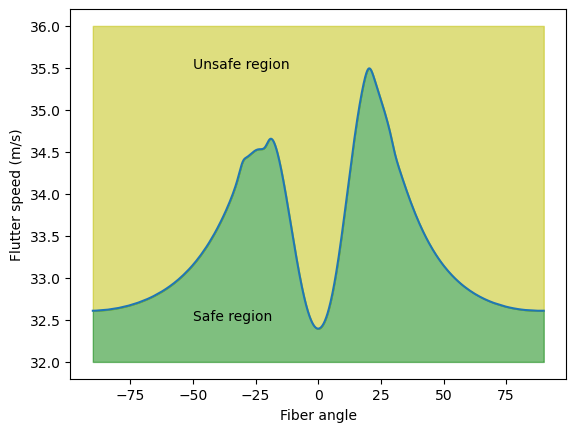

In [3]:
x,y = np.loadtxt('flutter.csv', delimiter= ',',unpack=True, skiprows=1)
plt.plot(x,y)
plt.xlabel('Fiber angle')
plt.ylabel('Flutter speed (m/s)')
plt.fill_between(x,y,y2=32,color='g',alpha=0.5)
plt.fill_between(x,y,y2=36,color='y',alpha=0.5)
plt.text(-50,32.5,'Safe region')
plt.text(-50,35.5,'Unsafe region')


The flutter speed curve in the above graph has been devided the region in two safe and unsafe regions. Hence, we can assumed this proble as a binary classification problem, and the flutter speed curve can be regarded as it decision boundary.

### load data
Several data points has been randomly generated in the both safe and unsafe regions. They have been loaded as follows:

In [4]:
fiber_angle, speed, label = np.loadtxt('input.csv',unpack =True, skiprows=1,delimiter=',')
X_train = np.c_[fiber_angle,speed]
y_train = label

It should be noted that the input features are fiber angle of the composite wing and cruise speed of the aircraft. The training data of this binary classification problem has been depicted in the following figure:

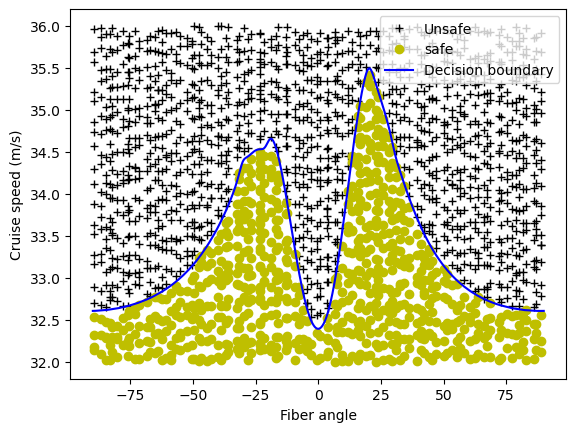

In [5]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Unsafe", neg_label="safe")
plt.plot(x,y,color='b',label='Decision boundary')
# Set the y-axis label
plt.xlabel('Fiber angle') 
# Set the x-axis label
plt.ylabel('Cruise speed (m/s)') 
plt.legend(loc="upper right")
plt.show()

## Goal
The main goal of this assigmnet is to determine the instability flutter boundary of the composite wing using machine learning tools. Recall that in Assignment 4, the student dealt with this problem by a polynomial logistic regression and neural networks. In this assignment, the strudent should:

- devide the data set into training data (80%) and test data (20%).
- adopt Extreme Gradient Boosting Decision Tree to create a binary classifier for this problem.
- train the classifier using `xgboost` package with default hyper-parameters.
- plot the learning curve for the adopted model.
- discuss the performance of the trained model with defualt hyper-parameters based on the obtained results.


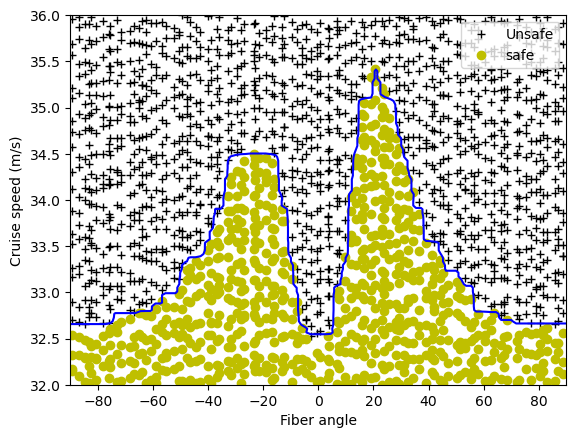

train score is 1.0.
test score is 0.9854014598540145.


In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_train_n, X_test, y_train_n, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = XGBClassifier()

model.fit(X_train_n, y_train_n)
y_pred = model.predict(X_test)

u = np.linspace(-90, 90, 100)
v = np.linspace(32, 36, 100)
uu, vv = np.meshgrid(u,v)

grid = np.stack((uu,vv))
grid = grid.T.reshape(-1,2)
outs = model.predict_proba(grid)
z = outs.T[0].reshape(uu.shape[0], uu.shape[1])
z = z.T

plot_data(X_train, y_train, pos_label="Unsafe", neg_label="safe")
plt.contour(u,v,z, levels = [0.5], colors="b")
plt.xlabel('Fiber angle') 
plt.ylabel('Cruise speed (m/s)') 
plt.legend(loc="upper right")
plt.show()

train_score = f1_score(y_train_n, model.predict(X_train_n))
test_score = f1_score(y_test, model.predict(X_test))
print(f"train score is {train_score}.")
print(f"test score is {test_score}.")      

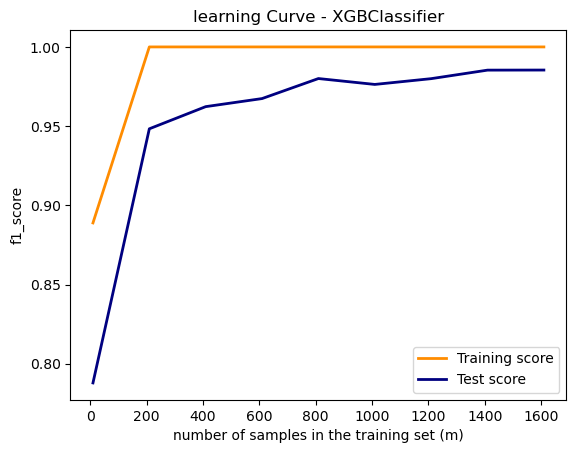

In [8]:
from sklearn.metrics import f1_score

m = np.arange(10, X_train_n.shape[0], 200)
train_score=np.zeros(m.size)
test_score=np.zeros(m.size)

for i in range(m.size):

    X = X_train_n[0:m[i]]
    Y = y_train_n[0:m[i]]
    
    model = XGBClassifier()
    model.fit(X, Y)
    
    train_score[i] = f1_score(Y, model.predict(X))

    test_score[i] = f1_score(y_test, model.predict(X_test))
        
plt.plot(m, train_score, label="Training score", color="darkorange", lw=2)
plt.plot(m, test_score, label="Test score", color="navy", lw=2)

plt.title("learning Curve - XGBClassifier")
plt.xlabel("number of samples in the training set (m)")
plt.ylabel("f1_score")
plt.legend()
plt.show()